In [1]:
# Import Libraries
# NumPy: library for numerical operations and linear algebra
import numpy as np

# Pandas: library for data manipulation and analysis
import pandas as pd 

# Seaborn: library for statistical data visualization
import seaborn as sns

# Matplotlib: library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt


In [3]:
# Load the training dataset from a CSV file

# Reading the CSV file "train.csv" into a DataFrame
# index_col=0 indicates that the first column should be used as the index
train_data_old = pd.read_csv("train.csv", index_col=0)

# Display the first two rows of the DataFrame to get an overview of the data
train_data_old.head(2)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
# Mapping categorical values in the 'Sex' column to numerical values

# Convert the 'Sex' column from categorical ('male', 'female') to numerical (0, 1)
# 'male' is mapped to 0 and 'female' to 1
train_data_old['Sex'] = train_data_old['Sex'].map({'male': 0, 'female': 1})

# Display the first two rows of the updated DataFrame to verify the changes
train_data_old.head(2)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


| Variable | Definition                                     | Key                                      | Data Type |
|----------|------------------------------------------------|------------------------------------------|-----------|
| survival | Survival                                       | 0 = No, 1 = Yes                         | int64     |
| pclass   | Ticket class                                   | 1 = 1st, 2 = 2nd, 3 = 3rd              | int64     |
| name     | Passenger name                                 |                                          | object    |
| sex      | Sex                                            |                                          | int64    |
| age      | Age in years                                   |                                          | float64   |
| sibsp    | # of siblings / spouses aboard the Titanic     |                                          | int64     |
| parch    | # of parents / children aboard the Titanic      |                                          | int64     |
| ticket   | Ticket number                                  |                                          | object    |
| fare     | Passenger fare                                 |                                          | float64   |
| cabin    | Cabin number                                   |                                          | object    |
| embarked | Port of Embarkation                           | C = Cherbourg, Q = Queenstown, S = Southampton | object    |


In [8]:
# Extracting unique titles from the 'Name' column in the training dataset

# Initialize an empty set to store unique titles
titles = set()

# Loop through each name in the 'Name' column
for name in train_data_old['Name']:
    # Split the name to extract the title and strip any leading/trailing whitespace
    titles.add(name.split(',')[1].split('.')[0].strip())

# Print the unique titles found in the dataset
print(titles)
# Example output: set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])

# Creating a dictionary to map titles to more generalized categories
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty1",
    "Don": "Royalty1",
    "Sir": "Royalty1",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty2",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty2"
}

# Function to extract and map titles to their generalized categories
def get_titles(combined):
    # Extract the title from each name in the 'Name' column
    combined['Title'] = combined['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    
    # Map each extracted title to its corresponding category using Title_Dictionary
    combined['Title'] = combined['Title'].map(Title_Dictionary)
    
    return combined


{'Mr', 'Rev', 'Mlle', 'Master', 'Dr', 'Lady', 'Col', 'Capt', 'Miss', 'Major', 'Ms', 'the Countess', 'Jonkheer', 'Mrs', 'Sir', 'Mme', 'Don'}


In [10]:
train_data_old = get_titles(train_data_old)
train_data_old.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [12]:
# Extracting and processing the 'Cabin' column from the training dataset

# Get the 'Cabin' column from the DataFrame
cabin_data = train_data_old['Cabin']

# Replace NaN values with 'N' and convert the series to a list
cabin_data2 = cabin_data.replace(np.nan, 'N').to_list()

# Extract the first character from each cabin value
# This creates a new list where each value is either the first character of the cabin number or 'N' for missing values
new_cabin_data = [cab_value[0] for cab_value in cabin_data2]

# Update the 'Cabin' column in the original DataFrame with the processed cabin data
train_data_old['Cabin'] = new_cabin_data

# Display the unique values in the updated 'Cabin' column
set(train_data_old.Cabin)


{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T'}

In [14]:
# Performing one-hot encoding on categorical variables in the training dataset

# One-hot encode the 'Embarked' and 'Title' columns
# The prefix and prefix separator are set to empty to avoid adding unnecessary prefixes to the new columns
train_data_old_one_hot = pd.get_dummies(train_data_old, columns=['Embarked', 'Title'], prefix='', prefix_sep='')

# One-hot encode the 'Cabin' column
# This will create new columns for each unique cabin value, prefixed with 'Cabin_'
train_data_old_one_hot = pd.get_dummies(train_data_old_one_hot, columns=['Cabin'], prefix='Cabin', prefix_sep='_')

# Display the columns of the resulting DataFrame after one-hot encoding
train_data_old_one_hot.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'C', 'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer',
       'Royalty1', 'Royalty2', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_N', 'Cabin_T'],
      dtype='object')

In [16]:
train_data_old_one_hot = train_data_old_one_hot.drop(columns=['Name','Ticket'])
train_data_old_one_hot.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,...,Royalty2,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1,1,1,38.0,1,0,71.2833,True,False,False,...,False,False,False,True,False,False,False,False,False,False


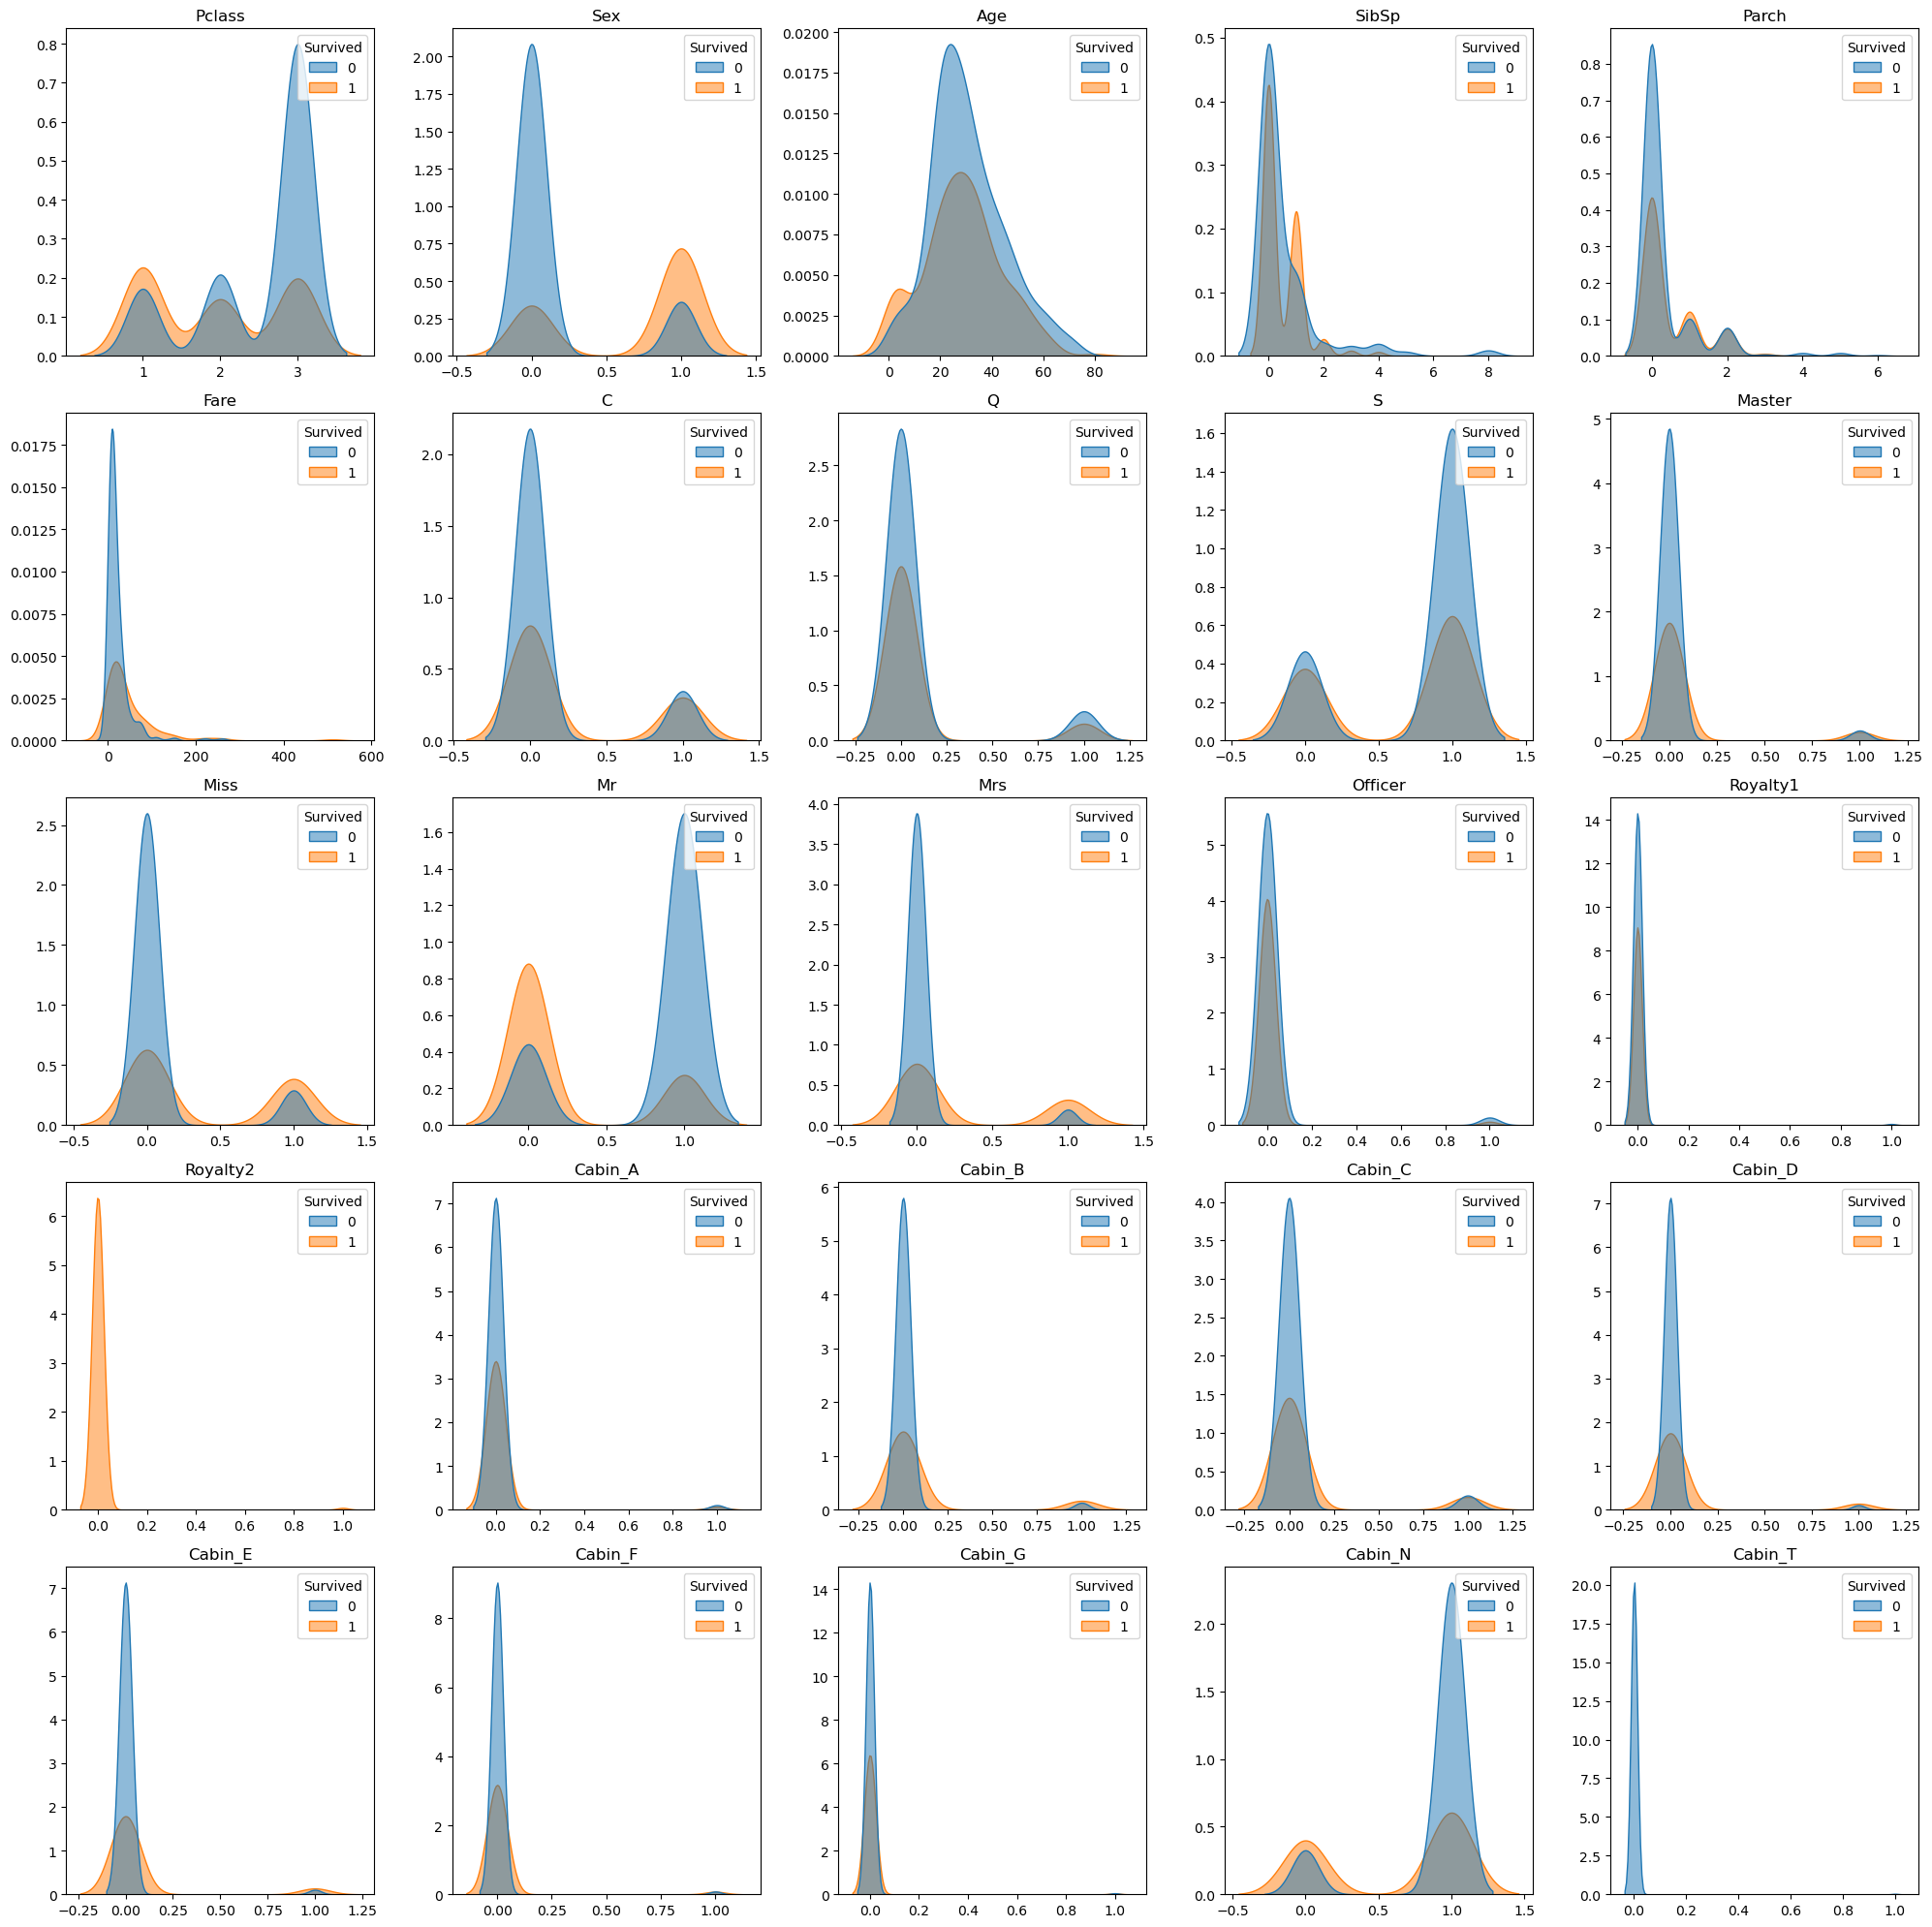

In [18]:
# Setting up to visualize the distributions of numerical columns using KDE plots

# Count the number of columns in the one-hot encoded DataFrame
num_columns = len(train_data_old_one_hot.columns)

# Create a 5x5 grid of subplots with specified figure size
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns (skipping the first column) and plot KDEs
for ax, column in zip(axes, train_data_old_one_hot.columns[1:]):
    # Generate a Kernel Density Estimate (KDE) plot for the current column
    sns.kdeplot(data=train_data_old_one_hot, x=train_data_old_one_hot[column], 
                 hue='Survived', fill=True, alpha=0.5, ax=ax, warn_singular=False)
    
    # Set the title of each subplot to the column name
    ax.set_title(f'{column}')
    # Clear x and y labels for a cleaner look
    ax.set_xlabel('')
    ax.set_ylabel('')

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
# Count NaNs in each column
nan_count = train_data_old_one_hot.isna().sum()
print(train_data_old_one_hot.shape)
print(nan_count)

(891, 26)
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
C             0
Q             0
S             0
Master        0
Miss          0
Mr            0
Mrs           0
Officer       0
Royalty1      0
Royalty2      0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_N       0
Cabin_T       0
dtype: int64


In [22]:
train_data_old_one_hot[train_data_old_one_hot.isna().any(axis=1)]["Survived"].describe()

count    177.000000
mean       0.293785
std        0.456787
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [24]:
train_data_old_one_hot[train_data_old_one_hot.isna().any(axis=1)].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,...,Royalty2,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
6,0,3,0,NaN,0,0,8.4583,False,True,False,...,False,False,False,False,False,False,False,False,True,False
18,1,2,0,NaN,0,0,13.0000,False,False,True,...,False,False,False,False,False,False,False,False,True,False
20,1,3,1,NaN,0,0,7.2250,True,False,False,...,False,False,False,False,False,False,False,False,True,False
27,0,3,0,NaN,0,0,7.2250,True,False,False,...,False,False,False,False,False,False,False,False,True,False
29,1,3,1,NaN,0,0,7.8792,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [26]:
# Importing train_test_split for splitting the dataset into training and validation sets
from sklearn.model_selection import train_test_split

# Preparing the dataset for modeling

# The entire DataFrame with one-hot encoded features
train_data = train_data_old_one_hot

# Target variable: 'Survived' column
y = train_data["Survived"]

# Feature set: all columns except 'Survived'
X = train_data.drop(columns=["Survived"])

# Splitting the data into training and validation sets
# 30% of the data will be used for validation, and the random_state ensures reproducibility
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the first few rows of the training features
train_X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Master,...,Royalty2,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
446,1,0,4.0,0,2,81.8583,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
651,3,0,NaN,0,0,7.8958,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
173,3,1,1.0,1,1,11.1333,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
451,2,0,36.0,1,2,27.7500,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
315,2,0,43.0,1,1,26.2500,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [28]:
# Convert all boolean columns in the training features to integers
# This is important for model compatibility as many algorithms require numerical input
bool_cols = train_X.select_dtypes(include='bool').columns
train_X[bool_cols] = train_X[bool_cols].astype(int)

# Identify all categorical columns in the training features
object_cols = [col for col in train_X.columns if train_X[col].dtype == "object"]
print(object_cols)

# Identify columns with low cardinality (fewer than 15 unique values)
# These columns will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if train_X[col].nunique() < 15]

# Identify columns with high cardinality (15 or more unique values)
# These columns will be dropped from the dataset
high_cardinality_cols = list(set(object_cols) - set(low_cardinality_cols))

# Print out the results
print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

# Display the data types of each column in the training feature set
train_X.dtypes


[]
Categorical columns that will be one-hot encoded: []

Categorical columns that will be dropped from the dataset: []


Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
C             int64
Q             int64
S             int64
Master        int64
Miss          int64
Mr            int64
Mrs           int64
Officer       int64
Royalty1      int64
Royalty2      int64
Cabin_A       int64
Cabin_B       int64
Cabin_C       int64
Cabin_D       int64
Cabin_E       int64
Cabin_F       int64
Cabin_G       int64
Cabin_N       int64
Cabin_T       int64
dtype: object

In [30]:
# Importing necessary modules for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Preprocessing pipeline for numerical data
# This pipeline replaces missing values with the median and then scales the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())                     # Standardize the features (mean=0, std=1)
])

# Preprocessing pipeline for categorical data
# This pipeline replaces missing values with the most frequent value and applies one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder())                             # Apply one-hot encoding to categorical variables
])

# Identify numerical and categorical columns for preprocessing
numerical_cols = [cname for cname in train_X.columns if train_X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in train_X.columns if train_X[cname].dtype == 'object']

# Print the identified numerical and categorical columns
print('numerical_cols:', numerical_cols)
print('categorical_cols:', categorical_cols)

# Bundle the preprocessing for numerical and categorical data into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  # Numerical transformations
        ('cat', categorical_transformer, categorical_cols)  # Categorical transformations
    ])

print('done')


numerical_cols: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty1', 'Royalty2', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_N', 'Cabin_T']
categorical_cols: []
done


In [32]:
# Importing necessary machine learning models and evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the Support Vector Machine (SVM) model
# Using a radial basis function (RBF) kernel
model_svm = svm.SVC(kernel='rbf')




In [34]:
# Importing necessary libraries for modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the Logistic Regression model
model_reg = LogisticRegression(C=1.0, penalty='l2', tol=0.0001, solver="lbfgs")
model_use = model_reg  # Assigning the model to be used in the pipeline

# Create a pipeline that bundles preprocessing and model training
my_log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', model_use)              # Model training step
])

# Fit the pipeline on the training data
my_log_pipeline.fit(train_X, train_y)

# Make predictions on the validation data
preds = my_log_pipeline.predict(val_X)

# Evaluate the model on the training data
train_preds = my_log_pipeline.predict(train_X)

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(train_y, train_preds)
train_precision = precision_score(train_y, train_preds, average='weighted')
train_recall = recall_score(train_y, train_preds, average='weighted')
train_f1 = f1_score(train_y, train_preds, average='weighted')

# Print training metrics
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")

# Evaluate the model on the validation data
accuracy = accuracy_score(val_y, preds)
precision = precision_score(val_y, preds, average='weighted')
recall = recall_score(val_y, preds, average='weighted')
f1 = f1_score(val_y, preds, average='weighted')

# Print validation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Print a detailed classification report
print("\nClassification Report:")
print(classification_report(val_y, preds))

# Print a few predictions alongside actual values for comparison
print("A few predictions:", preds[0:10], "compared to actual values:", val_y.tolist()[0:10])


Train Accuracy: 0.8411
Train Precision: 0.8405
Train Recall: 0.8411
Train F1 Score: 0.8407
Accuracy: 0.8172
Precision: 0.8169
Recall: 0.8172
F1 Score: 0.8170

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       157
           1       0.78      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

A few predictions: [1 0 0 1 1 1 1 0 1 1] compared to actual values: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]


In [36]:
# Importing necessary libraries for model training and evaluation
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the Stochastic Gradient Descent (SGD) classifier model
model_reg = SGDClassifier(random_state=0)  # Setting random_state for reproducibility
model_use = model_reg  # Assigning the model to be used in the pipeline

# Create a pipeline that combines preprocessing and model training
my_sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', model_use)              # Model training step
])

# Fit the pipeline on the training data
my_sgd_pipeline.fit(train_X, train_y)

# Make predictions on the validation data
preds = my_sgd_pipeline.predict(val_X)

# Evaluate the model on the training data
train_preds = my_sgd_pipeline.predict(train_X)

# Calculate evaluation metrics for the training data
train_accuracy = accuracy_score(train_y, train_preds)
train_precision = precision_score(train_y, train_preds, average='weighted')
train_recall = recall_score(train_y, train_preds, average='weighted')
train_f1 = f1_score(train_y, train_preds, average='weighted')

# Print training metrics
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")

# Evaluate the model on the validation data
accuracy = accuracy_score(val_y, preds)
precision = precision_score(val_y, preds, average='weighted')
recall = recall_score(val_y, preds, average='weighted')
f1 = f1_score(val_y, preds, average='weighted')

# Print validation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report for detailed metrics on validation data
print("\nClassification Report:")
print(classification_report(val_y, preds))

# Print a few predictions alongside actual values for comparison
print("A few predictions:", preds[0:10], "compared to actual values:", val_y.tolist()[0:10])


Train Accuracy: 0.7753
Train Precision: 0.7928
Train Recall: 0.7753
Train F1 Score: 0.7787
Accuracy: 0.7873
Precision: 0.8020
Recall: 0.7873
F1 Score: 0.7889

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       157
           1       0.70      0.85      0.77       111

    accuracy                           0.79       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.80      0.79      0.79       268

A few predictions: [1 0 0 1 0 1 1 0 1 1] compared to actual values: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]


In [38]:
# Importing necessary libraries for hyperparameter tuning and decision tree modeling
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Defining hyperparameter grid for GridSearchCV
params = {
    'max_leaf_nodes': list(range(2, 50)),  # Number of maximum leaf nodes
    'min_samples_split': [2, 3, 4],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': list(range(2, 20))  # Minimum number of samples required to be at a leaf node
}

# Setting up GridSearchCV to tune the Decision Tree Classifier
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), 
                               params, 
                               n_jobs=-1,  # Use all available processors for computation
                               verbose=1)  # Print progress messages

# Assign the GridSearchCV object to model_use for the pipeline
model_use = grid_search_cv

# Create a pipeline that bundles preprocessing and model training
my_treegrid_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', model_use)              # Model training step
])

# Fit the pipeline on the training data
my_treegrid_pipeline.fit(train_X, train_y)

# Output the best estimator from the grid search
best_model = grid_search_cv.best_estimator_
print("Best model parameters:", best_model)


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best model parameters: DecisionTreeClassifier(max_leaf_nodes=15, min_samples_leaf=4, random_state=42)


In [40]:
model_dt = DecisionTreeClassifier(max_leaf_nodes=15, min_samples_leaf=4, random_state=42)
model_use = model_dt
# Bundle preprocessing and modeling code in a pipeline
my_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_use)
                             ])
# Preprocessing of training data, fit model 
my_tree_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_tree_pipeline.predict(val_X)

# Evaluate the model
train_preds = my_tree_pipeline.predict(train_X)
# Calculate metrics
train_accuracy = accuracy_score(train_y, train_preds)
train_precision = precision_score(train_y, train_preds, average='weighted')
train_recall = recall_score(train_y, train_preds, average='weighted')
train_f1 = f1_score(train_y, train_preds, average='weighted')

# Print metrics
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")




accuracy = accuracy_score(val_y, preds)
precision = precision_score(val_y, preds, average='weighted')
recall = recall_score(val_y, preds, average='weighted')
f1 = f1_score(val_y, preds, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(val_y, preds))

print("a few predictions", preds[0:10], "compared to actual values", val_y.tolist()[0:10])

Train Accuracy: 0.8764
Train Precision: 0.8761
Train Recall: 0.8764
Train F1 Score: 0.8749
Accuracy: 0.7910
Precision: 0.7915
Recall: 0.7910
F1 Score: 0.7875

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.67      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

a few predictions [1 0 0 1 0 1 1 0 1 1] compared to actual values [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]


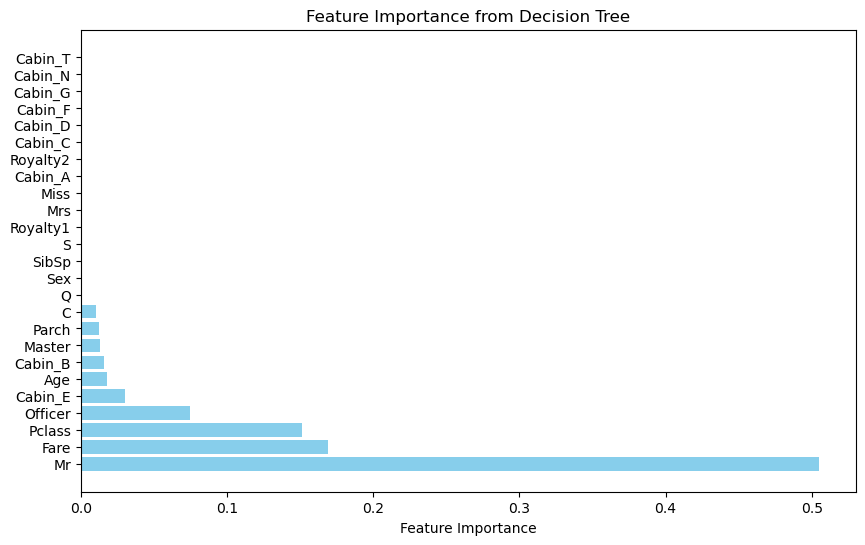

In [42]:
# Get feature importances
feature_importances = my_tree_pipeline.named_steps['model'].feature_importances_
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.show()


In [44]:
model_rf = RandomForestClassifier()
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', 0.5],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit the model
model_use = grid_search_rf
# Bundle preprocessing and modeling code in a pipeline
my_rf_grid_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_use)
                             ])
# Preprocessing of training data, fit model 
my_rf_grid_pipeline.fit(train_X, train_y)

# Print the best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.8475741935483871


In [46]:
model_rf_to_fit = RandomForestClassifier(max_features='log2', min_samples_leaf=2, min_samples_split=5, n_estimators=50)
model_use = model_rf
# Bundle preprocessing and modeling code in a pipeline
my_rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_use)
                             ])
# Preprocessing of training data, fit model 
my_rf_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_rf_pipeline.predict(val_X)

# Evaluate the model
train_preds = my_rf_pipeline.predict(train_X)
# Calculate metrics
train_accuracy = accuracy_score(train_y, train_preds)
train_precision = precision_score(train_y, train_preds, average='weighted')
train_recall = recall_score(train_y, train_preds, average='weighted')
train_f1 = f1_score(train_y, train_preds, average='weighted')

# Print metrics
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")




accuracy = accuracy_score(val_y, preds)
precision = precision_score(val_y, preds, average='weighted')
recall = recall_score(val_y, preds, average='weighted')
f1 = f1_score(val_y, preds, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(val_y, preds))

print("a few predictions", preds[0:10], "compared to actual values", val_y.tolist()[0:10])

Train Accuracy: 0.9839
Train Precision: 0.9841
Train Recall: 0.9839
Train F1 Score: 0.9839
Accuracy: 0.7985
Precision: 0.7975
Recall: 0.7985
F1 Score: 0.7972

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

a few predictions [1 0 0 1 0 1 1 0 1 1] compared to actual values [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]


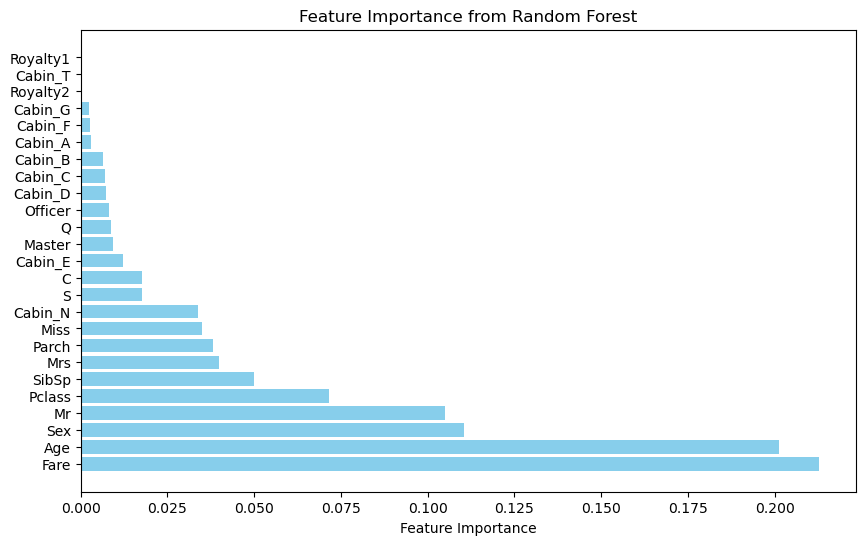

In [48]:
# Get feature importances
feature_importances = my_rf_pipeline.named_steps['model'].feature_importances_
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [50]:
# Define the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of boosting rounds
    'max_depth': [3, 4, 5, 6, 7],          # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],          # Fraction of samples to be used for each tree
    'colsample_bytree': [0.8, 0.9, 1.0]    # Fraction of features to be used for each tree
}

# Setup the GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',          # Scoring metric
                           cv=5,                        # 5-fold cross-validation
                           verbose=1,                  # Print progress messages
                           n_jobs=-1)                  # Use all available cores

# Fit the model to the training data
grid_search_xgb.fit(train_X, train_y)

# Output the best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)


# Fit the model
model_use = grid_search_xgb
# Bundle preprocessing and modeling code in a pipeline
my_xgb_grid_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_use)
                             ])
# Preprocessing of training data, fit model 
my_xgb_grid_pipeline.fit(train_X, train_y)

# Print the best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validation Score:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
Best Score: 0.8395354838709679
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best Cross-Validation Score: 0.8475483870967742


In [52]:
model_xgb_to_fit = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9)
model_use = model_xgb_to_fit
# Bundle preprocessing and modeling code in a pipeline
my_xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_use)
                             ])
# Preprocessing of training data, fit model 
my_xgb_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_xgb_pipeline.predict(val_X)

# Evaluate the model
train_preds = my_xgb_pipeline.predict(train_X)
# Calculate metrics
train_accuracy = accuracy_score(train_y, train_preds)
train_precision = precision_score(train_y, train_preds, average='weighted')
train_recall = recall_score(train_y, train_preds, average='weighted')
train_f1 = f1_score(train_y, train_preds, average='weighted')

# Print metrics
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")




accuracy = accuracy_score(val_y, preds)
precision = precision_score(val_y, preds, average='weighted')
recall = recall_score(val_y, preds, average='weighted')
f1 = f1_score(val_y, preds, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(val_y, preds))

print("a few predictions", preds[0:10], "compared to actual values", val_y.tolist()[0:10])

Train Accuracy: 0.9165
Train Precision: 0.9178
Train Recall: 0.9165
Train F1 Score: 0.9154
Accuracy: 0.7985
Precision: 0.7975
Recall: 0.7985
F1 Score: 0.7976

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.77      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

a few predictions [0 0 0 1 1 1 1 0 1 1] compared to actual values [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]


In [68]:
test_data_old = pd.read_csv("test.csv")
test_data_old['Sex'] = test_data_old['Sex'].map({'male': 0, 'female': 1})
test_data_old = get_titles(test_data_old)

# Get the 'Cabin' column from the DataFrame
cabin_data_test = test_data_old['Cabin']

# Replace NaN values with 'N' and convert the series to a list
cabin_data_test2 = cabin_data_test.replace(np.nan, 'N').to_list()

# Extract the first character from each cabin value
# This creates a new list where each value is either the first character of the cabin number or 'N' for missing values
new_cabin_data_test = [cab_value[0] for cab_value in cabin_data_test2]

# Update the 'Cabin' column in the original DataFrame with the processed cabin data
test_data_old['Cabin'] = new_cabin_data_test

test_data_old_one_hot = pd.get_dummies(test_data_old, columns=['Embarked', 'Title'], prefix='', prefix_sep='')

# One-hot encode the 'Cabin' column
# This will create new columns for each unique cabin value, prefixed with 'Cabin_'
test_X = pd.get_dummies(test_data_old_one_hot, columns=['Cabin'], prefix='Cabin', prefix_sep='_')

bool_cols = test_X.select_dtypes(include='bool').columns
test_X[bool_cols] = test_X[bool_cols].astype(int)
test_X[['Cabin_T', 'Royalty1', 'Royalty2']]=0
predictions = my_xgb_pipeline.predict(test_X)


output = pd.DataFrame({'PassengerId': test_data_old.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
